## Australian road accident - group number 36

### Group members: 
#### Eden Jerbi 
#### Shai Miles 
#### Yuval Avraham
#### Sharon Litvak

# Sources of information
### https://youtu.be/M8QIhsSDVsQ
### https://he.wikipedia.org/wiki/%D7%98%D7%9C%D7%A4%D7%95%D7%9F_%D7%A1%D7%9C%D7%95%D7%9C%D7%A8%D7%99

In [3037]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3038]:
url = 'https://raw.githubusercontent.com/yuvalavraham/my_project/main/data%20analysis%20project.csv'
acc_df = pd.read_csv(url, low_memory = False)
acc_df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day
0,20195049,WA,3,2019,Saturday,8:30:00 pm,Multiple,1,No,No,No,60,NaN,NaN,NaN,NaN,No,No,Weekend,Night
1,20195013,WA,1,2019,Sunday,7:48:00 pm,Multiple,1,No,No,No,110,NaN,NaN,NaN,NaN,No,No,Weekend,Night
2,20195110,WA,10,2019,Friday,10:09:00 pm,Single,2,No,No,No,50,NaN,NaN,NaN,NaN,No,No,Weekend,Night
3,20196026,Tas,8,2019,Sunday,4:30:00 am,Single,1,No,No,No,80,Outer Regional Australia,South East,Southern Midlands (M),Local Road,No,No,Weekend,Night
4,20195102,WA,4,2019,Sunday,12:05:00 am,Multiple,1,No,No,No,60,NaN,NaN,NaN,NaN,No,No,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,19891498,NSW,1,1989,Sunday,2:35:00 pm,Multiple,3,No,-9,No,80,NaN,NaN,NaN,NaN,Yes,No,Weekend,Day
45955,19893020,Qld,1,1989,Sunday,4:00:00 am,Pedestrian,1,No,-9,No,60,NaN,NaN,NaN,NaN,Yes,No,Weekend,Night
45956,19893344,Qld,1,1989,Sunday,1:00:00 am,Single,1,No,-9,No,60,NaN,NaN,NaN,NaN,Yes,No,Weekend,Night
45957,19893229,Qld,1,1989,Sunday,5:00:00 pm,Pedestrian,1,No,-9,No,60,NaN,NaN,NaN,NaN,Yes,No,Weekend,Day


In [3039]:
acc_df.shape

(45959, 20)

# 1.Wrangling data
# 1.1 Fix columns

In [3040]:
acc_df.dtypes

Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Number Fatalities                 int64
Bus \nInvolvement                object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Speed Limit                      object
National Remoteness Areas        object
SA4 Name 2016                    object
National LGA Name 2017           object
National Road Type               object
Christmas Period                 object
Easter Period                    object
Day of week                      object
Time of Day                      object
dtype: object

# 1.2 Missing values

In [3041]:
acc_df.isnull().sum().sort_values(ascending = False)

National Remoteness Areas        40867
National Road Type               40863
SA4 Name 2016                    40853
National LGA Name 2017           40852
Crash ID                             0
State                                0
Day of week                          0
Easter Period                        0
Christmas Period                     0
Speed Limit                          0
Articulated Truck Involvement        0
Heavy Rigid Truck Involvement        0
Bus \nInvolvement                    0
Number Fatalities                    0
Crash Type                           0
Time                                 0
Dayweek                              0
Year                                 0
Month                                0
Time of Day                          0
dtype: int64

In [3042]:
acc_df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Number Fatalities', 'Bus \nInvolvement',
       'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
       'Speed Limit', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of Day'],
      dtype='object')

# 1.3 Noisy data - outliers

In [3043]:
acc_df['SpeedLimit']  = acc_df['Speed Limit']
acc_df.SpeedLimit.unique()

array(['60', '110', '50', '80', '100', '70', '90', '130', '10', '20',
       '-9', '25', '40', '15', '<40', '30', '5', 'Unspecified', '75'],
      dtype=object)

In [3044]:
acc_df['SpeedLimit']  = acc_df['SpeedLimit'].replace({'<40':'40', '-9': '0' ,'15':'10','Unspecified':'0'})

In [3045]:
acc_df.SpeedLimit = acc_df.SpeedLimit.astype('int')
acc_df.dtypes

Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Number Fatalities                 int64
Bus \nInvolvement                object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Speed Limit                      object
National Remoteness Areas        object
SA4 Name 2016                    object
National LGA Name 2017           object
National Road Type               object
Christmas Period                 object
Easter Period                    object
Day of week                      object
Time of Day                      object
SpeedLimit                        int32
dtype: object

In [3046]:
acc_df['Heavy_Rigid_Truck_Involvement']  = acc_df['Heavy Rigid Truck Involvement']

In [3047]:
acc_df.replace({"-9" : '0' }, inplace=True)
acc_df.Heavy_Rigid_Truck_Involvement.unique()

array(['No', 'Yes', '0'], dtype=object)

# 1.4 Transformations 

In [3048]:
acc_df['New_Time'] = pd.to_datetime(acc_df['Time'], errors='coerce').dt.time

In [3049]:
acc_df.New_Time = acc_df.New_Time.astype('string')

In [3050]:
acc_df["hours"] =  acc_df["New_Time"].str.split(":", expand = True)[0]
acc_df["minutes"] =  acc_df["New_Time"].str.split(":", expand = True)[1]

In [3051]:
acc_df.drop(['Time'], axis=1, inplace=True)
acc_df

,Crash ID,State,Month,Year,Dayweek,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,SpeedLimit,Heavy_Rigid_Truck_Involvement,New_Time,hours,minutes
0,20195049,WA,3,2019,Saturday,Multiple,1,No,No,No,...,NaN,No,No,Weekend,Night,60,No,20:30:00,20,30
1,20195013,WA,1,2019,Sunday,Multiple,1,No,No,No,...,NaN,No,No,Weekend,Night,110,No,19:48:00,19,48
2,20195110,WA,10,2019,Friday,Single,2,No,No,No,...,NaN,No,No,Weekend,Night,50,No,22:09:00,22,09
3,20196026,Tas,8,2019,Sunday,Single,1,No,No,No,...,Local Road,No,No,Weekend,Night,80,No,04:30:00,04,30
4,20195102,WA,4,2019,Sunday,Multiple,1,No,No,No,...,NaN,No,No,Weekend,Night,60,No,00:05:00,00,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,19891498,NSW,1,1989,Sunday,Multiple,3,No,0,No,...,NaN,Yes,No,Weekend,Day,80,0,14:35:00,14,35
45955,19893020,Qld,1,1989,Sunday,Pedestrian,1,No,0,No,...,NaN,Yes,No,Weekend,Night,60,0,04:00:00,04,00
45956,19893344,Qld,1,1989,Sunday,Single,1,No,0,No,...,NaN,Yes,No,Weekend,Night,60,0,01:00:00,01,00
45957,19893229,Qld,1,1989,Sunday,Pedestrian,1,No,0,No,...,NaN,Yes,No,Weekend,Day,60,0,17:00:00,17,00


# 2.Understand the data

In [3052]:
acc_df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Crash Type',
       'Number Fatalities', 'Bus \nInvolvement',
       'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
       'Speed Limit', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of Day', 'SpeedLimit',
       'Heavy_Rigid_Truck_Involvement', 'New_Time', 'hours', 'minutes'],
      dtype='object')

In [3053]:
x= ["Crash ID","Month","Year","Dayweek","New_Time",'hours' ,"Crash Type","Number Fatalities","Bus \nInvolvement","Heavy Rigid Truck Involvement","Articulated Truck Involvement","SpeedLimit","Christmas Period","Easter Period","Day of week","Time of Day"]
acc_dff=pd.get_dummies(acc_df[x])
acc_dff

,Crash ID,Month,Year,New_Time,hours,Number Fatalities,SpeedLimit,Dayweek_Friday,Dayweek_Monday,Dayweek_Saturday,...,Articulated Truck Involvement_No,Articulated Truck Involvement_Yes,Christmas Period_No,Christmas Period_Yes,Easter Period_No,Easter Period_Yes,Day of week_Weekday,Day of week_Weekend,Time of Day_Day,Time of Day_Night
0,20195049,3,2019,20:30:00,20,1,60,0,0,1,...,1,0,1,0,1,0,0,1,0,1
1,20195013,1,2019,19:48:00,19,1,110,0,0,0,...,1,0,1,0,1,0,0,1,0,1
2,20195110,10,2019,22:09:00,22,2,50,1,0,0,...,1,0,1,0,1,0,0,1,0,1
3,20196026,8,2019,04:30:00,04,1,80,0,0,0,...,1,0,1,0,1,0,0,1,0,1
4,20195102,4,2019,00:05:00,00,1,60,0,0,0,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,19891498,1,1989,14:35:00,14,3,80,0,0,0,...,1,0,0,1,1,0,0,1,1,0
45955,19893020,1,1989,04:00:00,04,1,60,0,0,0,...,1,0,0,1,1,0,0,1,0,1
45956,19893344,1,1989,01:00:00,01,1,60,0,0,0,...,1,0,0,1,1,0,0,1,0,1
45957,19893229,1,1989,17:00:00,17,1,60,0,0,0,...,1,0,0,1,1,0,0,1,1,0


In [3054]:
acc_dff.columns

Index(['Crash ID', 'Month', 'Year', 'New_Time', 'hours', 'Number Fatalities',
       'SpeedLimit', 'Dayweek_Friday', 'Dayweek_Monday', 'Dayweek_Saturday',
       'Dayweek_Sunday', 'Dayweek_Thursday', 'Dayweek_Tuesday',
       'Dayweek_Wednesday', 'Crash Type_Multiple', 'Crash Type_Pedestrian',
       'Crash Type_Single', 'Bus \nInvolvement_0', 'Bus \nInvolvement_No',
       'Bus \nInvolvement_Yes', 'Heavy Rigid Truck Involvement_0',
       'Heavy Rigid Truck Involvement_No', 'Heavy Rigid Truck Involvement_Yes',
       'Articulated Truck Involvement_0', 'Articulated Truck Involvement_No',
       'Articulated Truck Involvement_Yes', 'Christmas Period_No',
       'Christmas Period_Yes', 'Easter Period_No', 'Easter Period_Yes',
       'Day of week_Weekday', 'Day of week_Weekend', 'Time of Day_Day',
       'Time of Day_Night'],
      dtype='object')

In [3055]:
acc_dff = acc_dff.drop(columns=['Crash ID', 'Bus \nInvolvement_0', 'Bus \nInvolvement_No','Heavy Rigid Truck Involvement_0','Heavy Rigid Truck Involvement_No','Articulated Truck Involvement_0' ,'Articulated Truck Involvement_No' , 'Christmas Period_No' , 'Easter Period_No','Day of week_Weekday'])
acc_dff.head()

,Month,Year,New_Time,hours,Number Fatalities,SpeedLimit,Dayweek_Friday,Dayweek_Monday,Dayweek_Saturday,Dayweek_Sunday,...,Crash Type_Pedestrian,Crash Type_Single,Bus \nInvolvement_Yes,Heavy Rigid Truck Involvement_Yes,Articulated Truck Involvement_Yes,Christmas Period_Yes,Easter Period_Yes,Day of week_Weekend,Time of Day_Day,Time of Day_Night
0,3,2019,20:30:00,20,1,60,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,1,2019,19:48:00,19,1,110,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,10,2019,22:09:00,22,2,50,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,8,2019,04:30:00,04,1,80,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4,4,2019,00:05:00,00,1,60,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [3056]:
acc_dff.columns

Index(['Month', 'Year', 'New_Time', 'hours', 'Number Fatalities', 'SpeedLimit',
       'Dayweek_Friday', 'Dayweek_Monday', 'Dayweek_Saturday',
       'Dayweek_Sunday', 'Dayweek_Thursday', 'Dayweek_Tuesday',
       'Dayweek_Wednesday', 'Crash Type_Multiple', 'Crash Type_Pedestrian',
       'Crash Type_Single', 'Bus \nInvolvement_Yes',
       'Heavy Rigid Truck Involvement_Yes',
       'Articulated Truck Involvement_Yes', 'Christmas Period_Yes',
       'Easter Period_Yes', 'Day of week_Weekend', 'Time of Day_Day',
       'Time of Day_Night'],
      dtype='object')

# 3. Correlations - patterns in the data

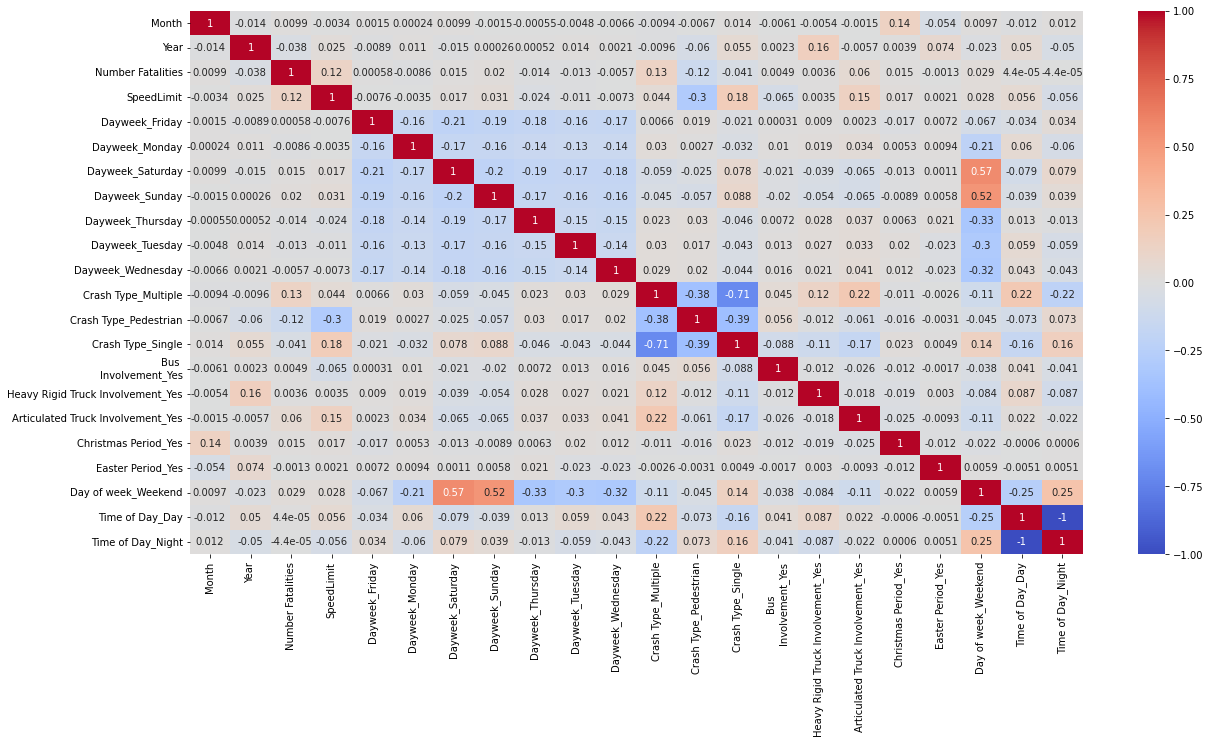

In [3057]:
corrs = acc_dff.corr(method = 'spearman')
plt.figure(figsize = (20,10))
sns.heatmap(corrs,cmap = 'coolwarm' , center = 0 , annot = True);

# 3.1. Correlation  between the crashes types and the speedlimit of the roads

In [3058]:
yuval = acc_dff.pivot_table('Crash Type_Single','SpeedLimit', aggfunc = 'mean')
yuval

,Crash Type_Single
SpeedLimit,
0,0.579545
5,0.333333
10,0.444444
20,0.500000
25,0.000000
30,0.538462
40,0.398714
50,0.371440
60,0.286344


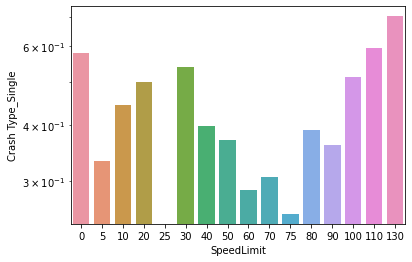

In [3083]:
S_speed = acc_dff.pivot_table('Crash Type_Single','SpeedLimit', aggfunc = 'mean').reset_index()
ax=sns.barplot(x='SpeedLimit', y='Crash Type_Single', data=S_speed)
ax.set_yscale("log")

In [3084]:
C_type=acc_dff.groupby('SpeedLimit')[['Crash Type_Multiple', 'Crash Type_Pedestrian','Crash Type_Single']].mean().reset_index()
C_type

,SpeedLimit,Crash Type_Multiple,Crash Type_Pedestrian,Crash Type_Single
0,0,0.253247,0.167208,0.579545
1,5,0.333333,0.333333,0.333333
2,10,0.055556,0.500000,0.444444
3,20,0.115385,0.384615,0.500000
4,25,0.000000,1.000000,0.000000
5,30,0.000000,0.461538,0.538462
6,40,0.250804,0.350482,0.398714
7,50,0.278291,0.350269,0.371440
8,60,0.385179,0.328477,0.286344
9,70,0.466372,0.226991,0.306637


In [3085]:
x=['SpeedLimit', 'Crash Type_Multiple', 'Crash Type_Pedestrian','Crash Type_Single']
melted_df = pd.melt(C_type[x], id_vars = 'SpeedLimit', value_vars = x)


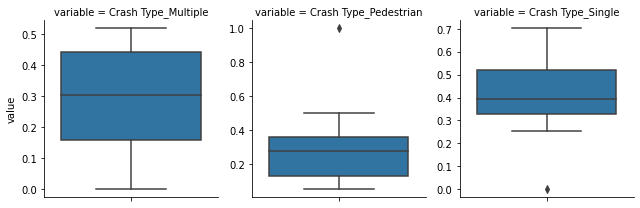

In [3093]:
g = sns.FacetGrid(data = melted_df, col="variable",  col_wrap=3, sharey=False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

### Observation 1:

#### The higher the speed limit the greater the percentage of single vehicle crashes than the other types of crashes.

# 3.2. Correlation between the months of the crashes and the number of fatalities

In [3063]:
Month_fatalities = acc_dff.pivot_table('Number Fatalities', 'Month' , aggfunc = 'count')
Month_fatalities

,Number Fatalities
Month,
1,3770
2,3522
3,4071
4,3721
5,3920
6,3724
7,3739
8,3847
9,3738


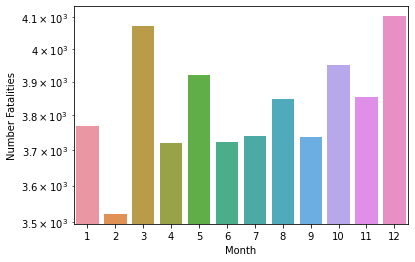

In [3064]:
Month_fatalities= acc_dff.pivot_table('Number Fatalities', 'Month' , aggfunc = 'count').reset_index()
order = [5,0,10,1,8,2,3,6,4,9,7,11]
ax=sns.barplot(x="Month", y="Number Fatalities", data=Month_fatalities)
ax.set_yscale("log")

### Observation 2:

##### In December the number of fatalities is the highest. We have found that the majority of Australia's population defines themselves as christians so the probable reason for the number of fatalities in December is the christmas holiday in which the population are on holiday.

# 3.3. Correlation between the types of the crashes over the years

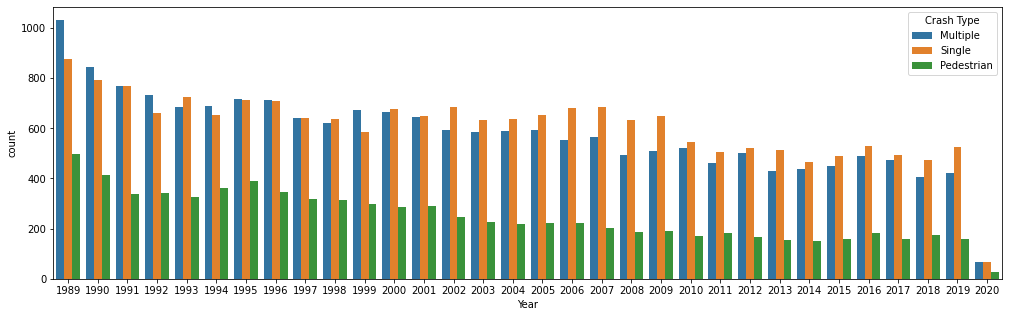

In [3065]:
plt.figure(figsize=(17,5))
sns.countplot(x="Year",hue="Crash Type" ,data=acc_df);

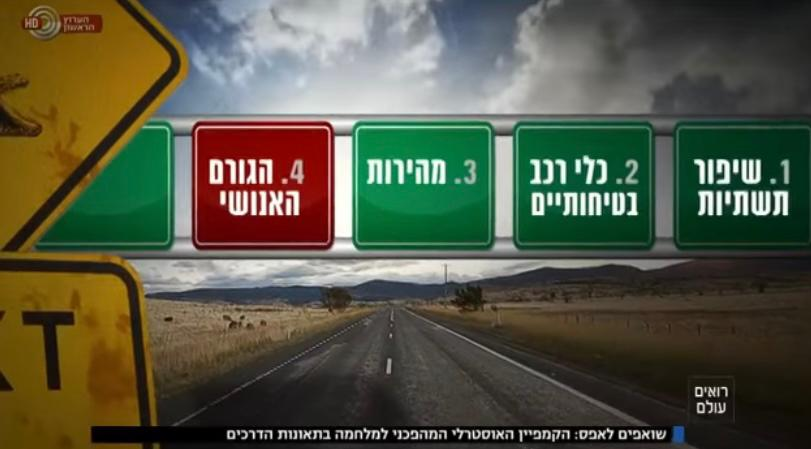

In [3066]:
from IPython.display import display
from PIL import Image
path1="הגורם האנושי .jpeg"
display(Image.open(path1))

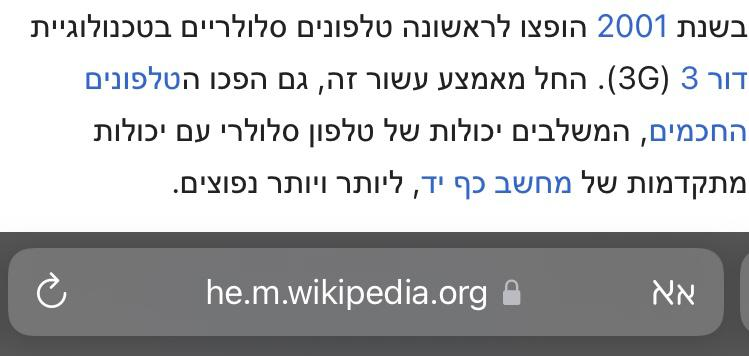

In [3067]:
path2="ויקיפדיה 2001.jpeg" 
display(Image.open(path2))

### Observation 3:

#### There is a direct link between the main type of crash before and after 2001, before-most accidents are multiple and after-most accidents are single.

# 4. Another graph to illustrate:

### Number of road accidents in each state in Australia

In [3068]:
acc_df.State.unique()


array(['WA', 'Tas', 'NT', 'ACT', 'Vic', 'NSW', 'Qld', 'SA'], dtype=object)

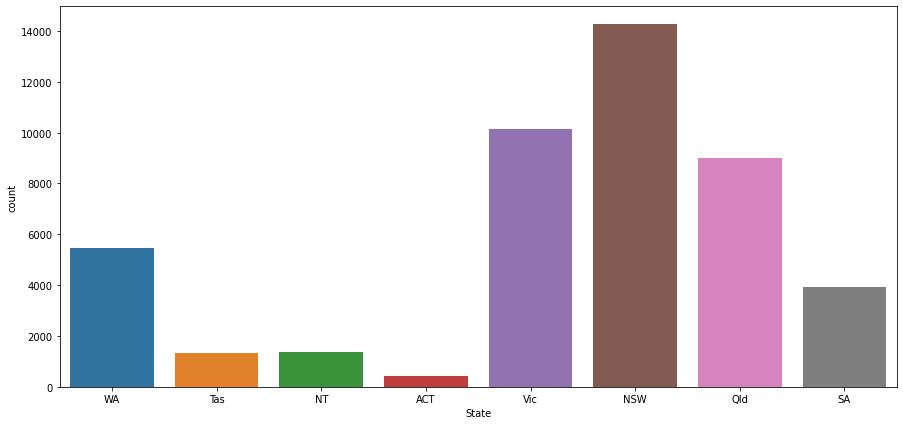

In [3069]:
plt.figure(figsize=(15,7))
sns.countplot(x="State", data=acc_df);

# 5. Classification model

In [3070]:
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3071]:
my_model = sk.tree.DecisionTreeClassifier(criterion="gini")

In [3072]:
features = ['Year','Month','Number Fatalities', ]
X = acc_dff[features]
y = acc_dff['Crash Type_Single']

In [3073]:
my_model.fit(X, y)

DecisionTreeClassifier()

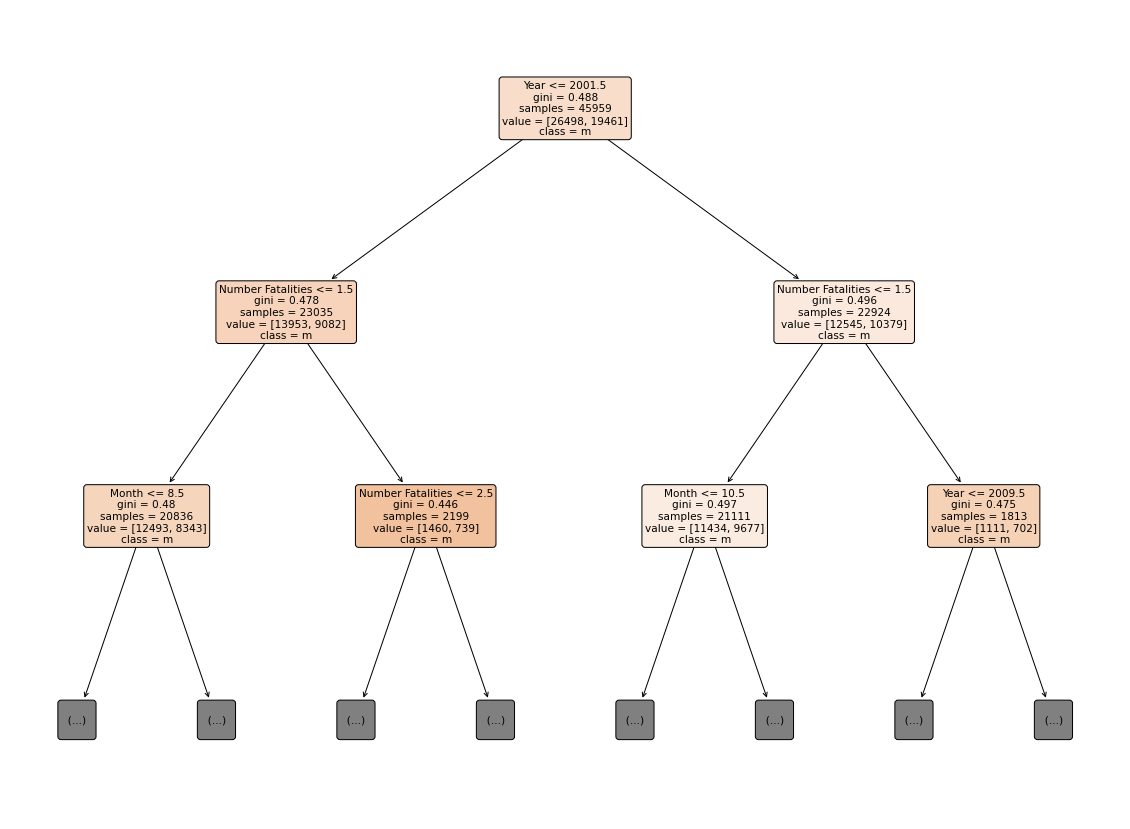

In [3074]:
fig = plt.figure(figsize=(20,15))

tree.plot_tree(my_model,max_depth = 2, 
               feature_names = features, 
               class_names = 'model1.classes_',
               filled=True, 
               rounded = True)  
plt.show()

In [3075]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42) 

In [3076]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [3077]:
prediction2 = model2.predict(X_test)

In [3078]:
df = pd.DataFrame(columns = ['Crash Type_Single', 'predictions'])

In [3079]:
df['Crash Type_Single'] = y_test
df = df.reset_index(drop=True)

In [3080]:
df['predictions'] = pd.Series(prediction2)
df

C:\Users\yuval\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Crash Type_Single,predictions
0,0,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
13783,0,0
13784,0,0
13785,1,0
13786,1,1


In [3081]:
sk.metrics.accuracy_score(prediction2, y_test)

0.5549753408761242

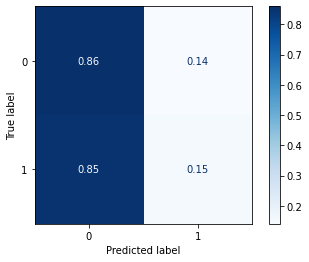

In [3082]:
prediction2 = model2.predict(X_test)
cm = confusion_matrix(y_test, prediction2, labels=model2.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap=plt.cm.Blues);